# Homework3

In [443]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
from IPython.display import Image
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', size=22)
plt.gcf().tight_layout()

<Figure size 432x288 with 0 Axes>

# Problem1

## In finite difference codes, the boundary condition are implemented in the taylor series approximations

## In finite volume code, a ghost cell is implemented and based on the flux from the ghost cell, the boundary conditions are determined

# Problem2

In [444]:
#Diffusion variables and initialization
k=1
phi1=1.
phi2=2.

In [445]:
delx=0.1
delt=1e-3
tmax=0.01
x=np.arange(0.,1.+delx,delx)
t=np.arange(0.,tmax+delt,delt)
xc= x[int((len(x))/2)]
phi_an=(phi2-phi1)*np.sqrt(0.001/(tmax+0.001))*np.exp(-0.25*(x-xc)**2/(k*(tmax+0.001)))+phi1
nts=int(tmax/delt)

#Explicit Solver
phi_ex=np.exp(-0.25*(x-xc)**2/(k*0.001))+phi1
C=delt*k/delx**2 #Simplifying constant
phi_p=phi_ex
for time in t:
    for i in range(len(x)):
        if (i==0):
            phi_p[i]=C*phi_ex[i+1]+(1-C)*phi_ex[i]
            continue
        if (i==len(x)-1):
            phi_p[i]=C*phi_ex[i-1]+(1-C)*phi_ex[i]
            continue
        phi_p[i]=C*phi_ex[i+1]+(1-2*C)*phi_ex[i]+C*phi_ex[i-1]
    phi_ex=phi_p
        

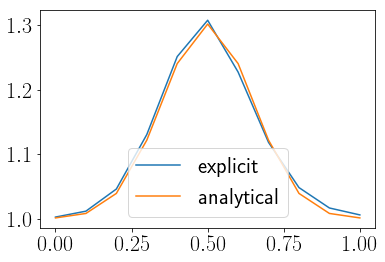

In [446]:
plt.plot(x,phi_ex,label='explicit')
plt.plot(x,phi_an,label='analytical')
plt.legend()

## The CFL condition says that the for time step size of 0.001, the spatial discretization should be atlease 0.3.

# Problem3

In [447]:
delx=1/128.
delt=1e-3
tmax=0.01
x_im=np.arange(0.,1.+delx,delx)
t=np.arange(0.,tmax+delt,delt)
xc= x_im[int((len(x_im))/2)]
phi_an=(phi2-phi1)*np.sqrt(0.001/(tmax+0.001))*np.exp(-0.25*(x_im-xc)**2/(k*(tmax+0.001)))+phi1
nts=int(tmax/delt)

#Implicit Solver
phi_im=np.exp(-0.25*(x_im-xc)**2/(k*0.001))+phi1
C=delt*k/delx**2 #Simplifying constant
xl=len(x_im)
M=-C*np.eye(xl,xl,k=-1) + (1+2*C)*np.eye(xl,xl) + -C*np.eye(xl,xl,k=1)
M[0,0]=1+C
M[-1,-1]=1+C
for time in t:
    phi_im=np.linalg.solve(M,phi_im)

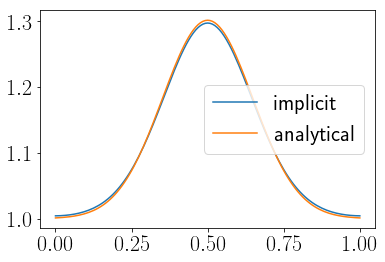

In [448]:
plt.plot(x_im,phi_im,label='implicit')
plt.plot(x_im,phi_an,label='analytical')
plt.legend()

# Problem4

## They are equal when the grid is uniform and the diffusivity is constant. If not, the question comes which diffusivity to use while discretisation in finite difference. Whereas, in finite volume case, since the fluxes are the result of averaging, the diffusivity not being constant won't matter as they get averaged.